[Trains a Bidirectional LSTM on the IMDB sentiment classification task.](https://keras.io/examples/imdb_bidirectional_lstm/)

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
MAX_FEATURES = 20000
EMBED_FEATURES = 128
MAX_LEN = 100
BATCH_SIZE = 32

In [4]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=MAX_LEN)
x_test = pad_sequences(x_test, maxlen=MAX_LEN)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [5]:
np.bincount(y_train)

array([12500, 12500])

In [6]:
model = Sequential([
    Embedding(MAX_FEATURES, EMBED_FEATURES, input_length=MAX_LEN),
    Bidirectional(LSTM(64)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,658,945
Trainable params: 2,658,945
Non-trainable params: 0
_________________________________________________________________


In [7]:
EPOCHS = 1000
STEPS = 100

history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    #steps_per_epoch=STEPS,
                    validation_data=[x_test, y_test],
                    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

Train on 25000 samples, validate on 25000 samples
Epoch 1/1000
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.4096 - accuracy: 0.8085 - val_loss: 0.3525 - val_accuracy: 0.8449
Epoch 2/1000
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.2223 - accuracy: 0.9135 - val_loss: 0.3791 - val_accuracy: 0.8464
Epoch 3/1000
25000/25000 [==============================] - 31s 1ms/sample - loss: 0.1337 - accuracy: 0.9508 - val_loss: 0.4100 - val_accuracy: 0.8310
Epoch 4/1000
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.0724 - accuracy: 0.9761 - val_loss: 0.5586 - val_accuracy: 0.8284
Epoch 5/1000
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.7170 - val_accuracy: 0.8326
Epoch 6/1000
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.7329 - val_accuracy: 0.8300
Epoch 7/1000
25000/25000 [==================

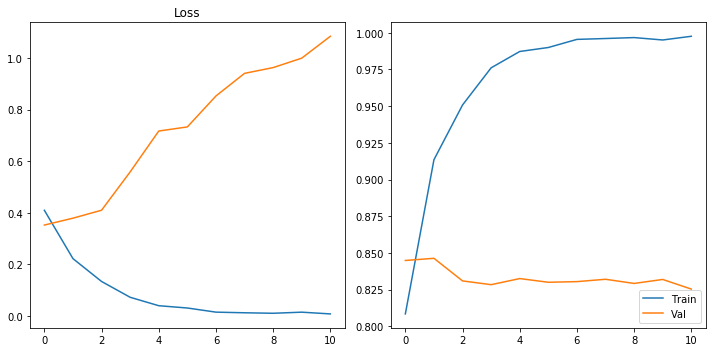

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['loss'], label='Train')
plt.plot(history.epoch, history.history['val_loss'], label='Val')
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['accuracy'], label='Train')
plt.plot(history.epoch, history.history['val_accuracy'], label='Val')
plt.legend(loc=4)
plt.tight_layout()

In [11]:
score, acc = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=0)
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.3524749507522583
Test accuracy: 0.84488
